In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Изучение магнитного и электрического гистерезиса
## Цель работы: 
* исследовать поляризацию сегнетоэлектриков в зависимости от напряжённости приложенного электрического поля;
* исследовать намагниченность ферромагнетиков в зависимости от напряжённости приложенного магнитного поля; 
* изучить явление гистерезиса на их примере

## Сегнетоэлектрики

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def round2(f):
    return round(f, 2)

In [3]:
x = np.array([15, 12, 10, 8, 7, 5.5, 4, 3, 1.5, 1])

In [4]:
y = np.array([14, 12.5, 11.5, 9.5, 8, 6.5, 5, 4.5, 2, 1])

In [5]:
N1 = 100
N2 = 200
R1 = 51
R2 = 4300
C = 0.00000022
r1 = 0.018
r2 = 0.009

In [6]:
Kx = 0.02 
Ky = 0.5

In [7]:
B = np.array(list(map(round2, R2*C*y*Ky/(5*N2*0.45) * 10000000)))

In [8]:
H = np.array(list(map(round2, 2*N1*x*Kx/(5*((r1+r2)/2)*R1))))

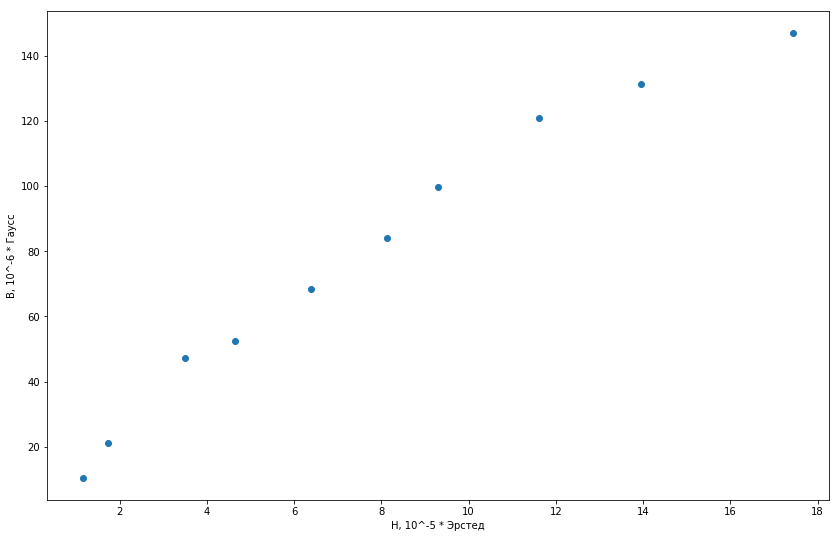

In [9]:
fig = plt.figure(figsize=(14, 9))
plt.scatter(H, B)
plt.xlabel("H, 10^-5 * Эрстед")
plt.ylabel("B, 10^-6 * Гаусс")
plt.show()

In [10]:
mu = np.array(list(map(round2, B/H)))

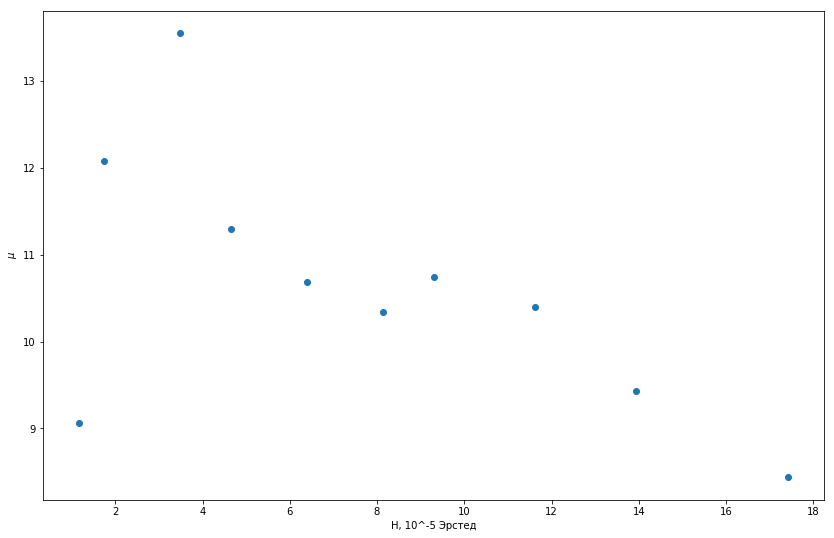

In [11]:
fig = plt.figure(figsize=(14, 9))
plt.scatter(H, mu)
plt.xlabel("H, 10^-5 Эрстед")
plt.ylabel("$\mu$")
plt.show()

In [12]:
n = len(x)
measures = pd.DataFrame(data=np.hstack((np.reshape(x, (n, 1)),
                                        np.reshape(y, (n, 1)),
                                        np.reshape(B, (n, 1)),
                                        np.reshape(H, (n, 1)),
                                        np.reshape(mu,(n, 1)))), 
                        columns=[r"x", 
                                 r"y",
                                 r"B",
                                 r"H",
                                 r"$\mu$"])
measures

,x,y,B,H,$\mu$
0,15.0,14.0,147.16,17.43,8.44
1,12.0,12.5,131.39,13.94,9.43
2,10.0,11.5,120.88,11.62,10.40
3,8.0,9.5,99.86,9.30,10.74
4,7.0,8.0,84.09,8.13,10.34
5,5.5,6.5,68.32,6.39,10.69
6,4.0,5.0,52.56,4.65,11.30
7,3.0,4.5,47.30,3.49,13.55
8,1.5,2.0,21.02,1.74,12.08
9,1.0,1.0,10.51,1.16,9.06


In [13]:
print("Максимальная магнитная проницаемость: ", round(mu.max(), 2))

Максимальная магнитная проницаемость:  13.55


In [14]:
print("Средняя магнитная проницаемость: ", round(mu.mean(), 2))

Средняя магнитная проницаемость:  10.6


In [15]:
Br = round2(R2*C*7*0.5/(5*N2*0.45) * 1000000)

In [16]:
Hc =  round2(2*N1*5*0.02/(5*((r1+r2)/2)*R1))

In [17]:
Bh = round2(R2*C*19*0.5/(5*N2*0.45) * 10000000)

In [18]:
Hh =  round2(2*N1*15.5*0.02/(5*((r1+r2)/2)*R1) * 10)

In [19]:
print("Mh = ", round2((Bh - Hh)/(4*np.pi)))

Mh =  1.56


In [20]:
print("Hc = ", Hc)
print("Br = ", Br)

Hc =  5.81
Br =  7.36


## Ферромагнетики

In [21]:
x = np.array([13, 12, 11, 10, 9, 15*0.5, 13*0.5, 5, 2.5, 1, 0.15])
y = np.array([13*5, 12*5, 8*5, 6.5*5, 4*5, 6,3, 2, 1, 6*0.05, 3.5*0.05])
V = np.array([75.1, 66.6, 60.6, 55.3, 50.9, 41.7, 34.6, 26.9, 13.1, 5.3, 0.7])

In [22]:
h = 0.1 
S = 6 * 3.5 *0.01
C2 = 0.047
R1 = 470 * 0.001
R2 = 11 * 0.001

In [23]:
D = np.array(list(map(round2, 12*np.pi*1000*h*C2*y/(5*S))))
E = np.array(list(map(round2,np.sqrt(2)*V/(300*h))))

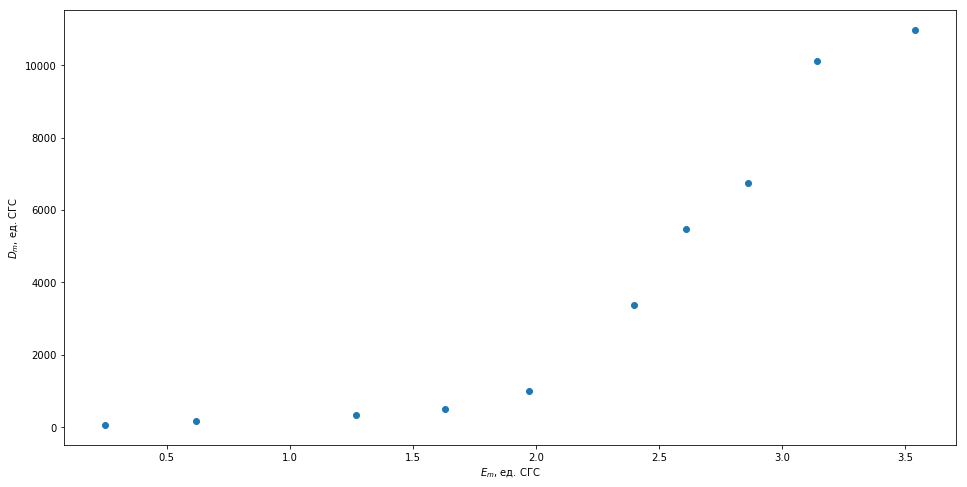

In [24]:
fig = plt.figure(figsize=(16, 8))
plt.scatter(E[:-1], D[:-1])

plt.xlabel("$E_m$, ед. CГС")
plt.ylabel("$D_m$, ед. СГС")
plt.show()

In [25]:
eps = np.array(list(map(round2, D / E)))

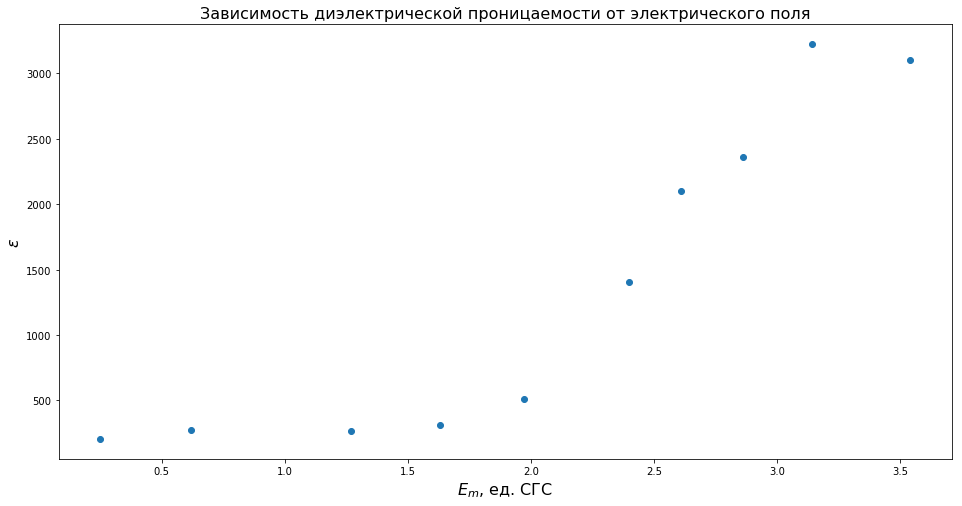

In [26]:
fig = plt.figure(figsize=(16, 8))
plt.scatter(E[:-1], eps[:-1])
plt.xlabel(r"$E_m$, ед. СГС", fontsize=16)
plt.ylabel(r"$\varepsilon$", fontsize=16)
plt.title("Зависимость диэлектрической проницаемости от электрического поля", fontsize=16)
plt.show()

In [27]:
n = len(x)
measures = pd.DataFrame(data=np.hstack((np.reshape(x,  (n, 1)),
                                        np.reshape(y,  (n, 1)),
                                        np.reshape(V,  (n, 1)),
                                        np.reshape(D,  (n, 1)),
                                        np.reshape(E,  (n, 1)),
                                        np.reshape(eps,(n, 1)))), 
                        columns=[r"x", 
                                 r"y",
                                 r"V",
                                 r"D",
                                 r"E",
                                 r"$\varepsilon$"])
measures

,x,y,V,D,E,$\varepsilon$
0,13.00,65.000,75.1,10968.65,3.54,3098.49
1,12.00,60.000,66.6,10124.90,3.14,3224.49
2,11.00,40.000,60.6,6749.94,2.86,2360.12
3,10.00,32.500,55.3,5484.32,2.61,2101.27
4,9.00,20.000,50.9,3374.97,2.40,1406.24
5,7.50,6.000,41.7,1012.49,1.97,513.95
6,6.50,3.000,34.6,506.25,1.63,310.58
7,5.00,2.000,26.9,337.50,1.27,265.75
8,2.50,1.000,13.1,168.75,0.62,272.18
9,1.00,0.300,5.3,50.62,0.25,202.48


In [28]:
print("Максимальная диэлектрическая проницаемость: ", round2(eps.max()))

Максимальная диэлектрическая проницаемость:  3224.49


In [29]:
print("Средняя диэлектрическая проницаемость среды : ", round2(eps.mean()))

Средняя диэлектрическая проницаемость среды :  1339.99


In [30]:
Dh = 12*np.pi*1000*h*C2*13.5*5/(5*S)
Eh = (R1+R2)/(300*R2*5*h)*15

In [31]:
print("Поляризация в насыщенном состоянии: ", round2((Dh-Eh)/(4*np.pi)))

Поляризация в насыщенном состоянии:  906.08


In [32]:
Dr = 12*np.pi*1000*h*C2*11*5/(5*S)
Ec = (R1+R2)/(300*R2*5*h)*12

In [33]:
print("D_r: ", Dr, '\nE_c: ', Ec)

D_r:  9281.162296605275 
E_c:  3.498181818181818
